In [167]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta
import numpy as np

In [121]:
df = pd.read_csv('CSVFile.csv')

In [122]:
df.head()

,Task name,Task description,Start time,End time,Duration,Duration in hours,Note,Tag
0,Food,NaN,"May 5, 2023 at 7:49:34 AM","May 5, 2023 at 8:46:58 AM",00:57:23,0.956522,NaN,NaN
1,Streaming,NaN,"May 5, 2023 at 8:47:34 AM","May 5, 2023 at 9:59:27 AM",01:11:52,1.198029,NaN,NaN
2,Sleep,Gym,"May 5, 2023 at 10:00:23 AM","May 5, 2023 at 4:47:17 PM",06:46:53,6.781592,NaN,NaN
3,Working,NaN,"May 5, 2023 at 4:47:55 PM","May 5, 2023 at 4:52:28 PM",00:04:32,0.075666,NaN,NaN
4,Washroom,NaN,"May 5, 2023 at 4:54:14 PM","May 5, 2023 at 5:00:44 PM",00:06:29,0.108073,NaN,NaN


In [123]:
df.columns

Index(['Task name', ' Task description', ' Start time', ' End time',
       ' Duration', 'Duration in hours', ' Note', ' Tag'],
      dtype='object')

In [124]:
FILENAME = 'CSVFile.csv'
START_TIME_FIELD = ' Start time'
END_TIME_FIELD = ' End time'
TASK_NAME_FIELD = 'Task name'
DURATION_FIELD = ' Duration'
SECONDS_PER_DAY = 86400
SECONDS_PER_HOUR = 3600

In [125]:
df.drop([' Task description', ' Note', ' Tag'], axis=1, inplace=True)
first_date = datetime.strptime(
    df[START_TIME_FIELD].iloc[0], '%b %d, %Y at %I:%M:%S %p')
last_date = datetime.strptime(
    df[START_TIME_FIELD].iloc[-1], '%b %d, %Y at %I:%M:%S %p')

In [126]:
def duration_to_hours(x: str):
    h, m, s = map(int, x.split(':'))
    return h + m / 60 + s / 3600

In [128]:
df[END_TIME_FIELD] = df[END_TIME_FIELD].apply(lambda x: datetime.date(datetime.strptime(x, '%b %d, %Y at %I:%M:%S %p')).isoformat())
df[DURATION_FIELD] = df[DURATION_FIELD].apply(duration_to_hours)

In [130]:
df.head()

,Task name,Start time,End time,Duration,Duration in hours
0,Food,"May 5, 2023 at 7:49:34 AM",2023-05-05,0.956389,0.956522
1,Streaming,"May 5, 2023 at 8:47:34 AM",2023-05-05,1.197778,1.198029
2,Sleep,"May 5, 2023 at 10:00:23 AM",2023-05-05,6.781389,6.781592
3,Working,"May 5, 2023 at 4:47:55 PM",2023-05-05,0.075556,0.075666
4,Washroom,"May 5, 2023 at 4:54:14 PM",2023-05-05,0.108056,0.108073


In [131]:
df = df[df[END_TIME_FIELD] >= '2023-01-01']

In [132]:
pd.unique(df[TASK_NAME_FIELD])

array(['Food', 'Streaming ', 'Sleep', 'Working', 'Washroom', 'Gaming',
       'Roaming', 'Social media', 'Programming ', 'Misc', 'Coffee',
       'Studying', 'Housework', 'Communication ', 'The Arts',
       'Depression', 'Browsing', 'Exercise', 'Research'], dtype=object)

In [133]:
df.head()

,Task name,Start time,End time,Duration,Duration in hours
0,Food,"May 5, 2023 at 7:49:34 AM",2023-05-05,0.956389,0.956522
1,Streaming,"May 5, 2023 at 8:47:34 AM",2023-05-05,1.197778,1.198029
2,Sleep,"May 5, 2023 at 10:00:23 AM",2023-05-05,6.781389,6.781592
3,Working,"May 5, 2023 at 4:47:55 PM",2023-05-05,0.075556,0.075666
4,Washroom,"May 5, 2023 at 4:54:14 PM",2023-05-05,0.108056,0.108073


In [134]:
df[TASK_NAME_FIELD] = df[TASK_NAME_FIELD].apply(lambda x: 'Productive' if x in ['Working', 'Programming', 'Studying', 'Research'] else x)

In [135]:
df.head()

,Task name,Start time,End time,Duration,Duration in hours
0,Food,"May 5, 2023 at 7:49:34 AM",2023-05-05,0.956389,0.956522
1,Streaming,"May 5, 2023 at 8:47:34 AM",2023-05-05,1.197778,1.198029
2,Sleep,"May 5, 2023 at 10:00:23 AM",2023-05-05,6.781389,6.781592
3,Productive,"May 5, 2023 at 4:47:55 PM",2023-05-05,0.075556,0.075666
4,Washroom,"May 5, 2023 at 4:54:14 PM",2023-05-05,0.108056,0.108073


In [136]:
daily_productive = (df[df[TASK_NAME_FIELD] == 'Productive']
                       .groupby(END_TIME_FIELD)[DURATION_FIELD]
                       .sum()
                       .reset_index())

In [137]:
daily_productive = daily_productive.sort_values(END_TIME_FIELD)

In [138]:
daily_productive.head()

,End time,Duration
0,2023-05-05,0.075556
1,2023-05-09,0.563333
2,2023-05-10,2.020833
3,2023-05-13,0.108056
4,2023-05-15,7.560278


In [139]:
ma = daily_productive[DURATION_FIELD].rolling(window=5, center=True, min_periods=1).mean()

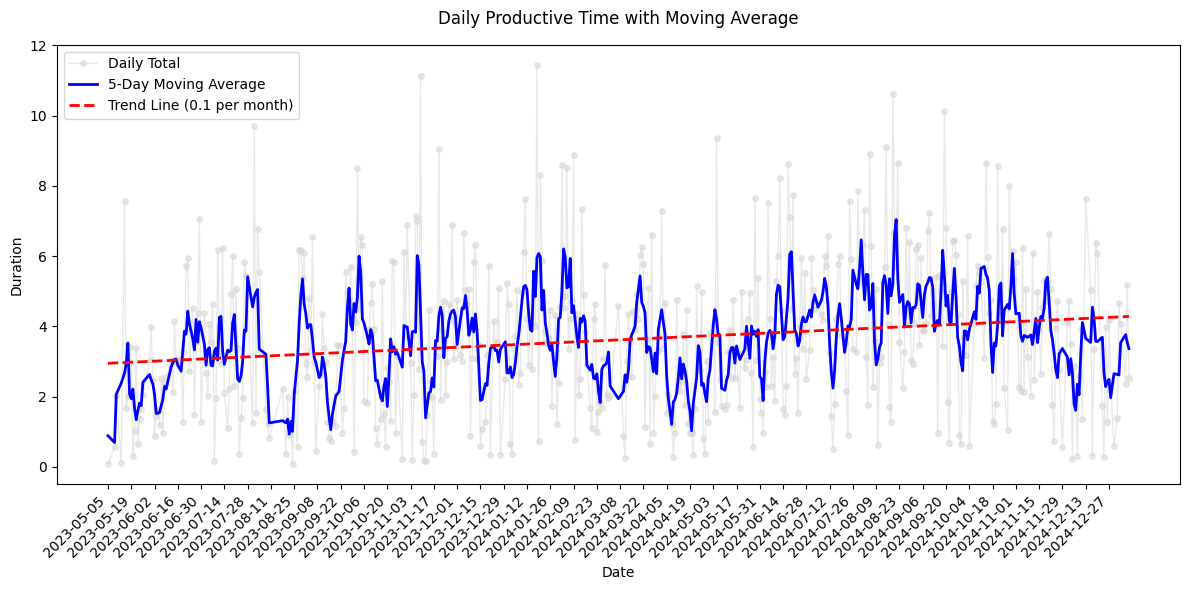

In [172]:
fig, ax = plt.subplots(figsize=(12, 6))

dates = daily_productive[END_TIME_FIELD].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# Calculate trend line
# Convert dates to numbers for trend line calculation
dates_numeric = mdates.date2num(daily_productive[END_TIME_FIELD])
z = np.polyfit(dates_numeric, daily_productive[DURATION_FIELD], 1)
p = np.poly1d(z)

# Calculate trend line slope (in units per day)
slope_per_day = z[0]
slope_per_month = slope_per_day * 30  # approximate monthly chang

# Plot raw values
ax.plot(dates, daily_productive[DURATION_FIELD], 
             color='lightgray', alpha=0.5, marker='o', linestyle='-', 
             linewidth=1, markersize=4, label='Daily Total')

# Plot moving averages
ax.plot(dates, ma, 
        color='blue', linewidth=2, label=f'{5}-Day Moving Average')

ax.plot(dates, p(dates_numeric), 
            color='red', linestyle='--', linewidth=2, 
            label=f'Trend Line ({slope_per_month:.1f} per month)')

date_range = daily_productive[END_TIME_FIELD].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
start_date = date_range.min()
end_date = date_range.max()

plt.title('Daily Productive Time with Moving Average', pad=15)
plt.xlabel('Date')
plt.ylabel('Duration')
plt.legend()

ax.set_xticks(np.arange(start_date, end_date, timedelta(days=14)).astype(datetime))

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()